# Data

The data came from on Kaggle: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download

## Features
This is where you'll get different information about each of the features in your data.

**create data dictionary**
1. age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Aysmptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital): anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
* restecgresting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to servere problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with exercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
* thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect (used to be defect but ok now)
    - 7: reversable defect (no proper blood movement when excercising)
* condition - have disease or not (1=yes, 0=no) (=the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
df = pd.read_csv('../data/external/heart_cleveland_upload.csv')
print('DataFrame shape (rows, columns):', df.shape)

DataFrame shape (rows, columns): (297, 14)


## Data Exploration
1. What kind of data do we have?
2. What's missing from the data and how do you deal with it?
3. Where are the outliers and why should you care about them?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [7]:
# Let's find out how many of each class there
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

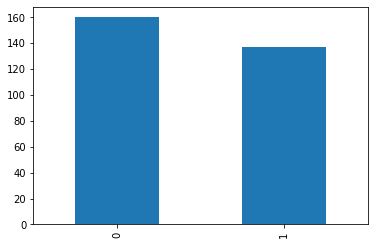

In [8]:
# Target is balanced (approximately)
df["condition"].value_counts().plot(kind="bar");

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
# Are there any missing values?
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

The following features are categorical features encoded as integers:

- `sex`
- `cp`
- `fbs`
- `restecg`
- `exang`
- `ca`
- `thal`


The following feature are continuous numerical features:

- `age`
- `trestbps`
- `chol`
- `thalach`
- `oldpeak`
- `slope`

In [12]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach','oldpeak', 'slope']
target_col = 'condition'

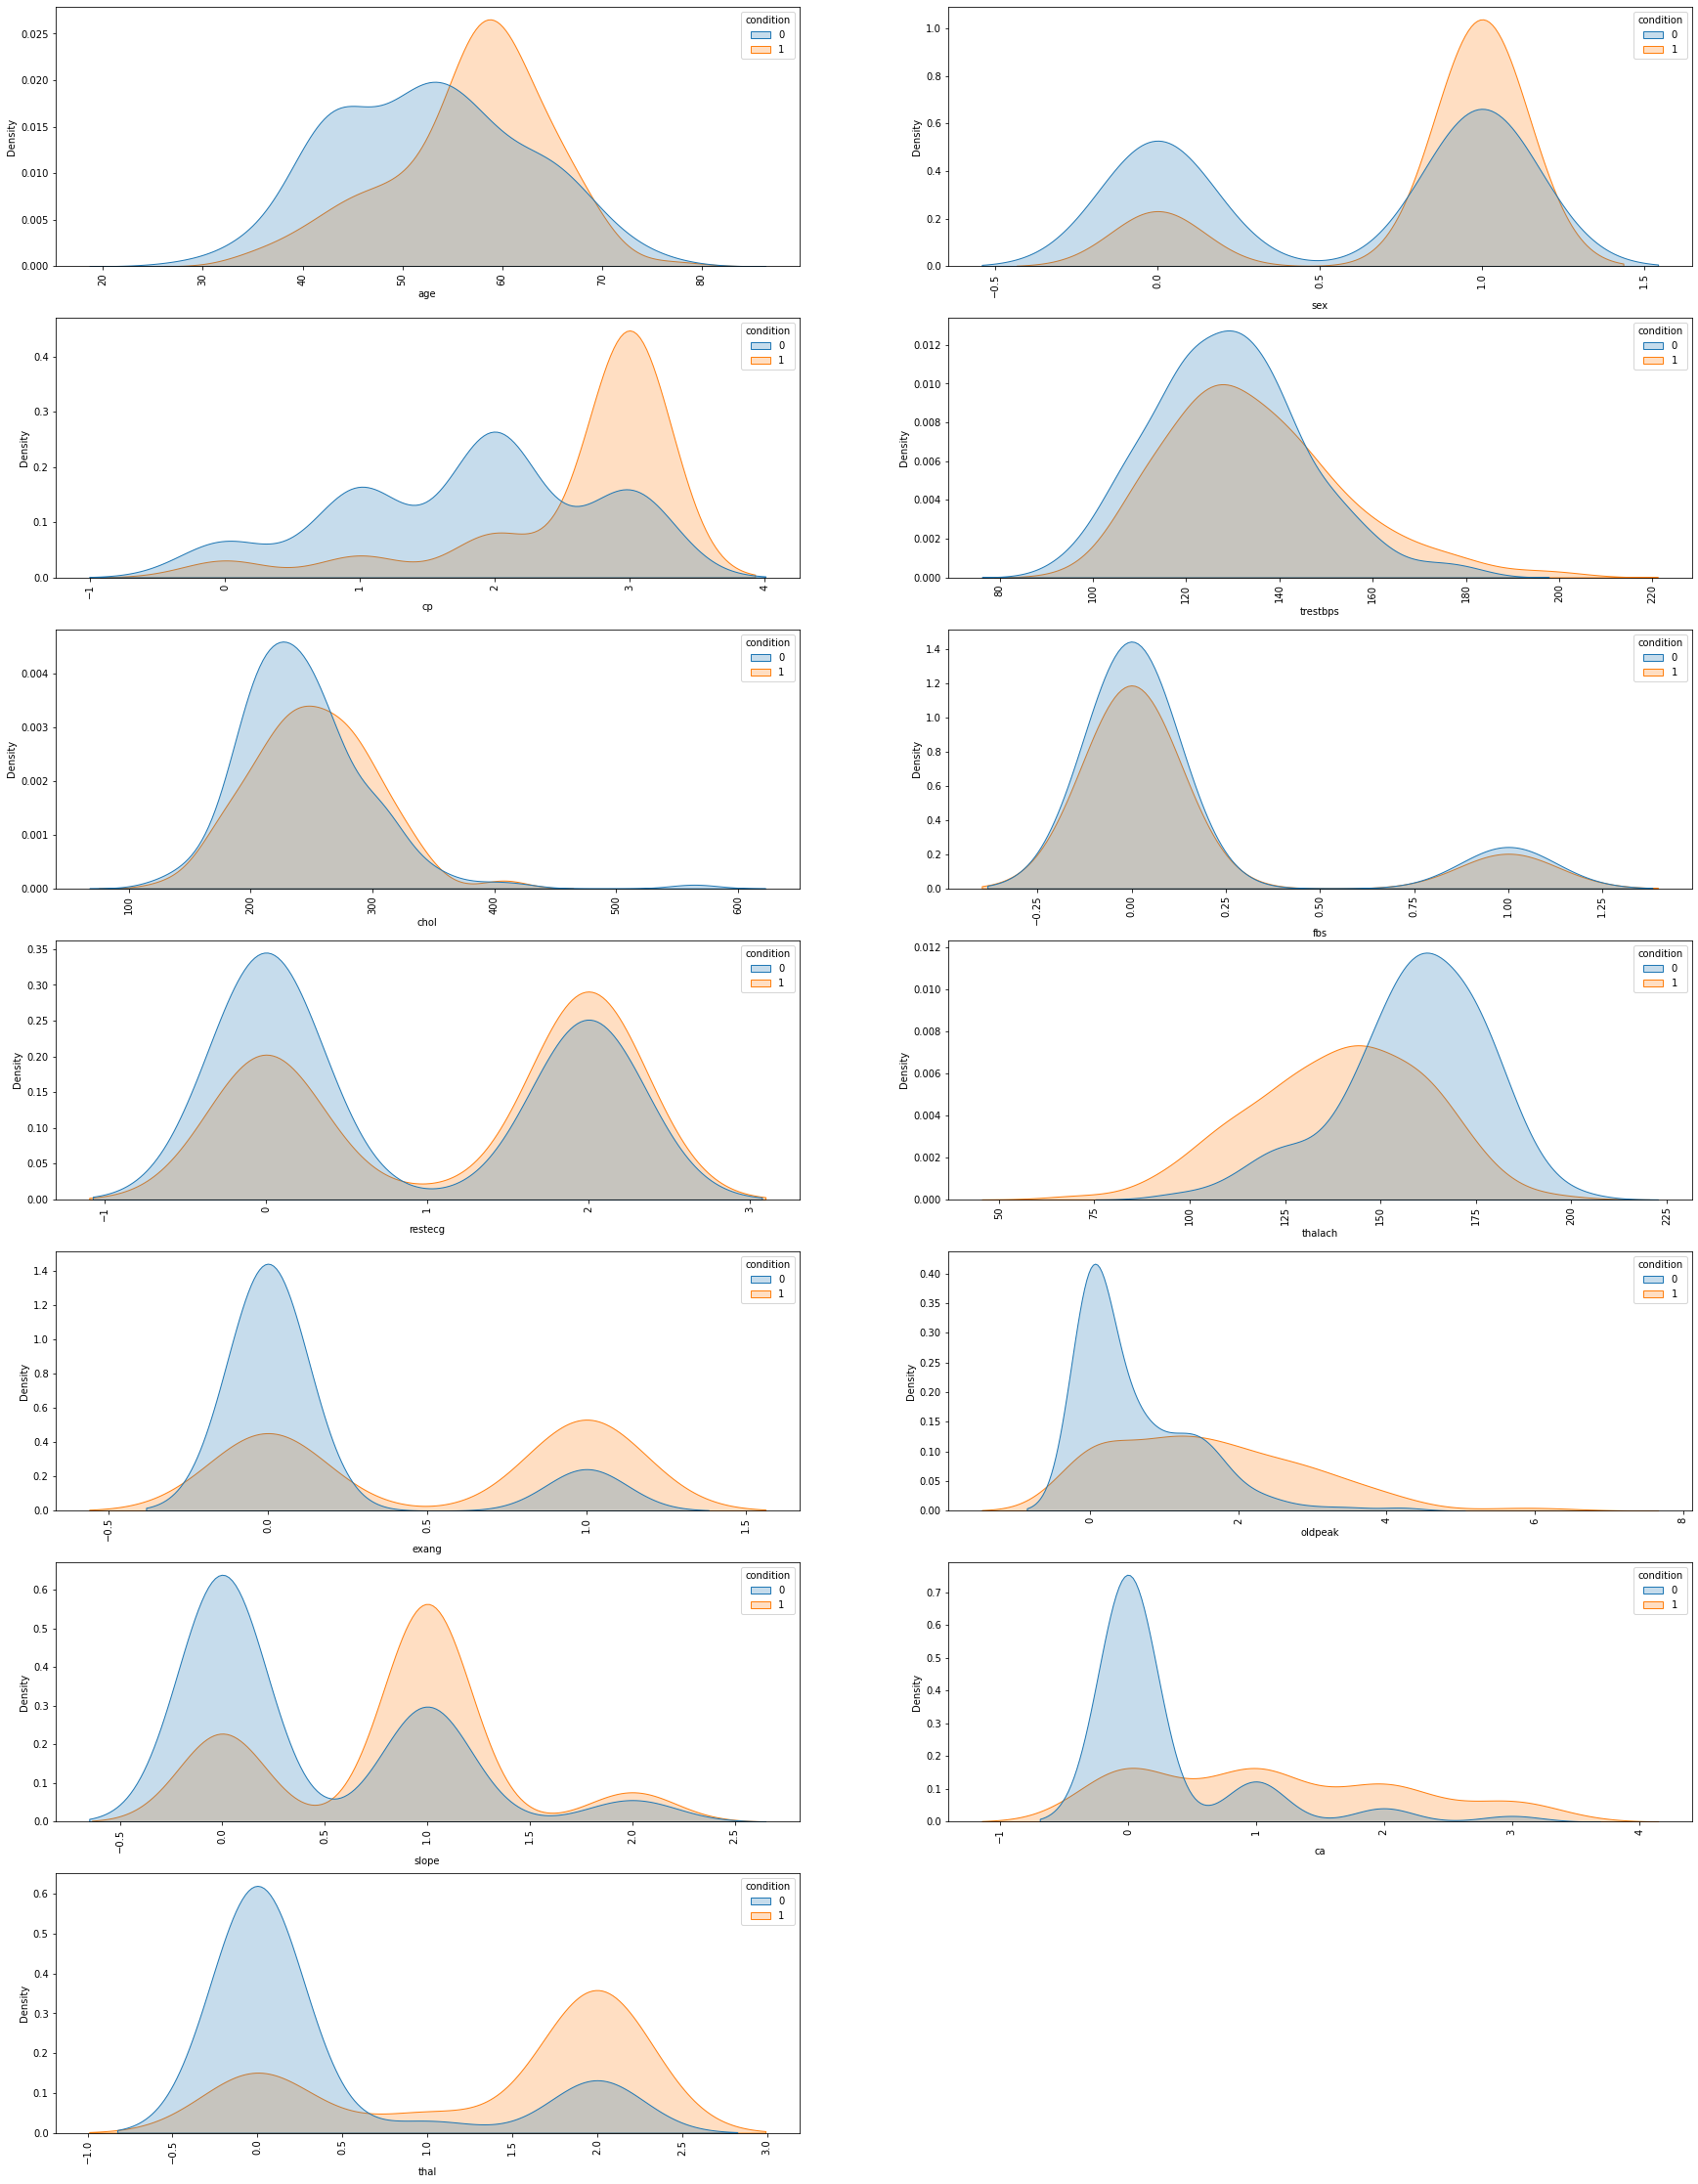

In [13]:
plt.figure(figsize=(30, 40))
for i, col in enumerate(df.drop(columns=target_col).columns):
    plt.subplot(7, 2, i + 1)
    sns.kdeplot(data=df, x=col, hue=target_col, fill=True)
    plt.xticks(rotation=90)

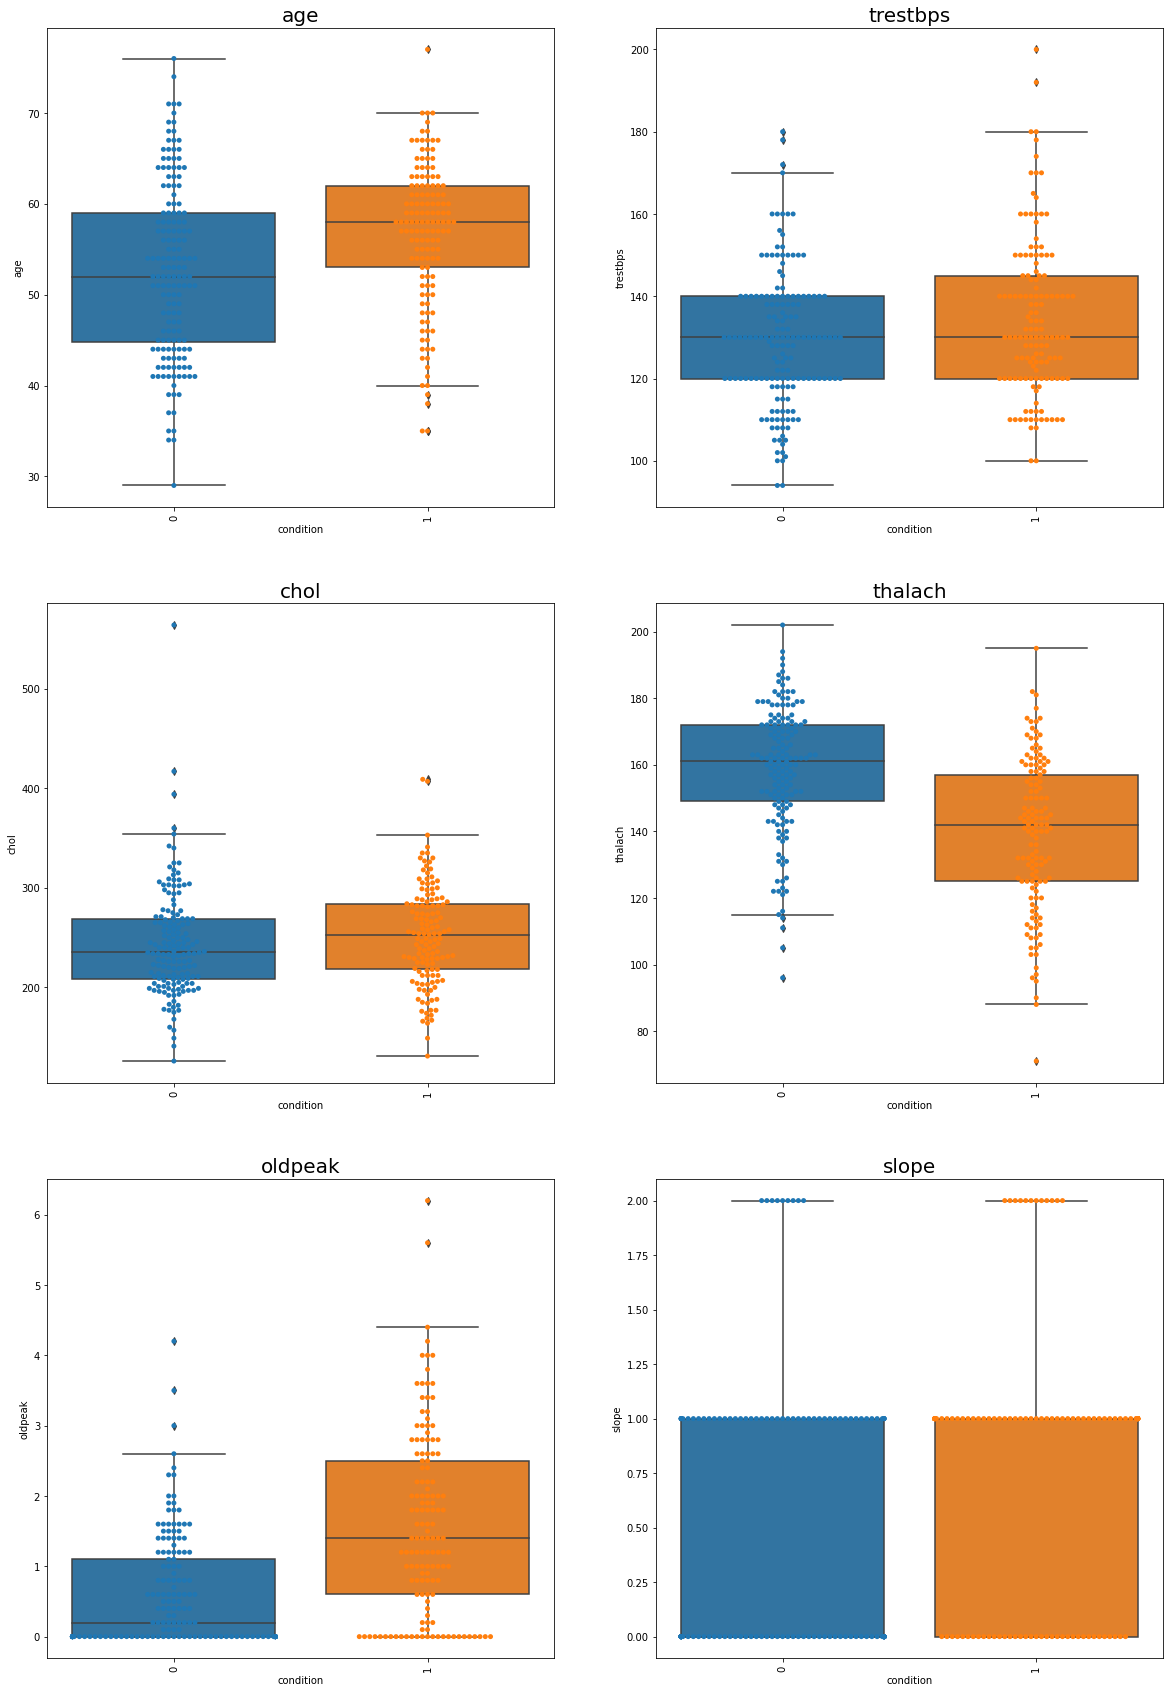

In [14]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x=target_col, y=col)
    sns.swarmplot(data=df, x=target_col, y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20)

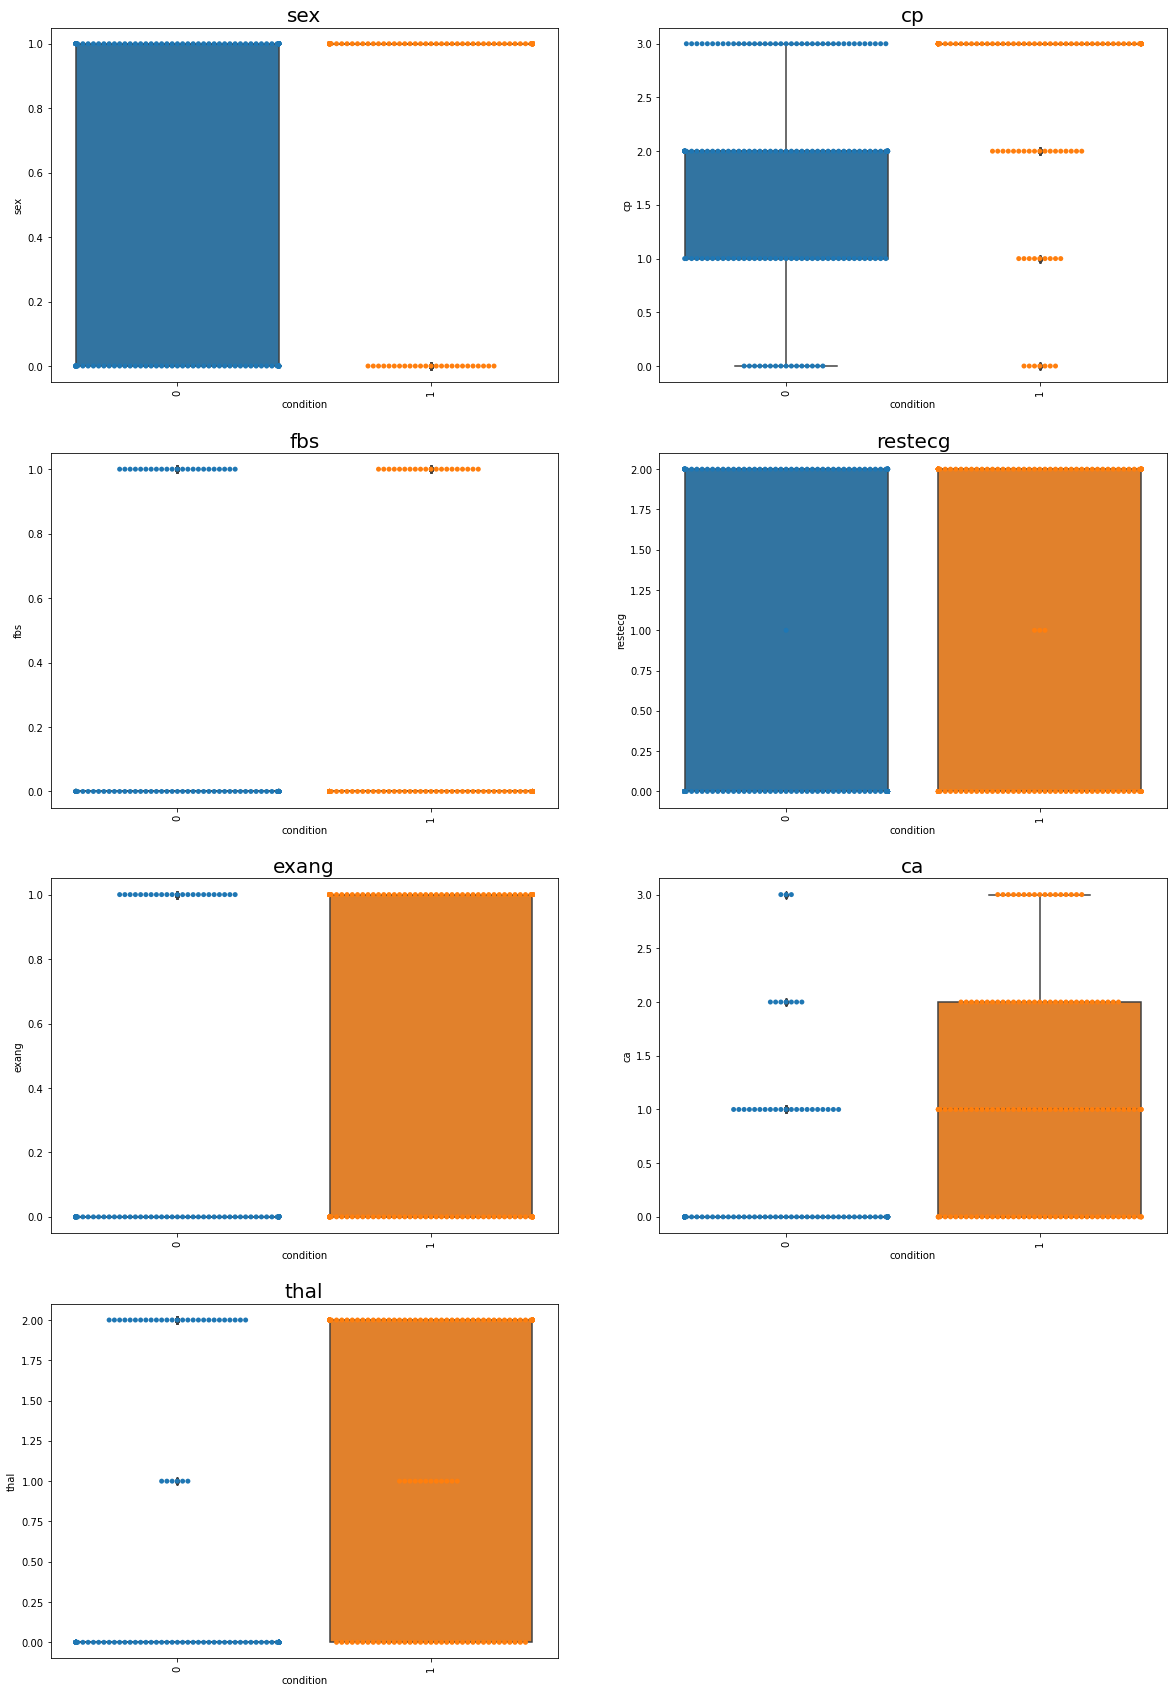

In [15]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=df, x=target_col, y=col)
    sns.swarmplot(data=df, x=target_col, y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20)

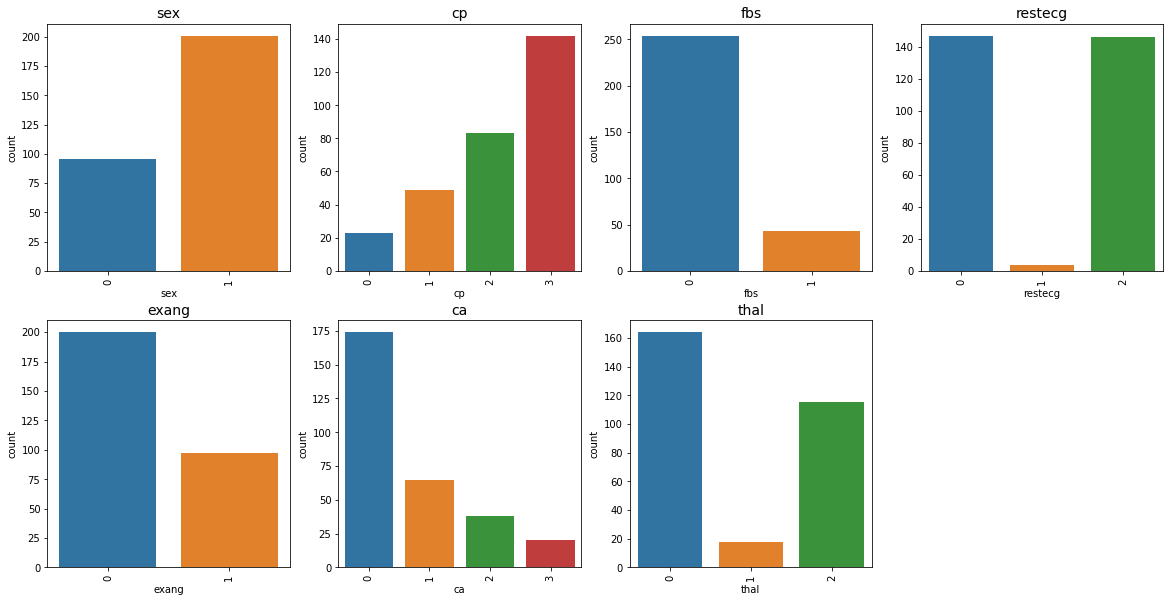

In [16]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=14)

Outliers and anomalies are not noticed

<AxesSubplot:>

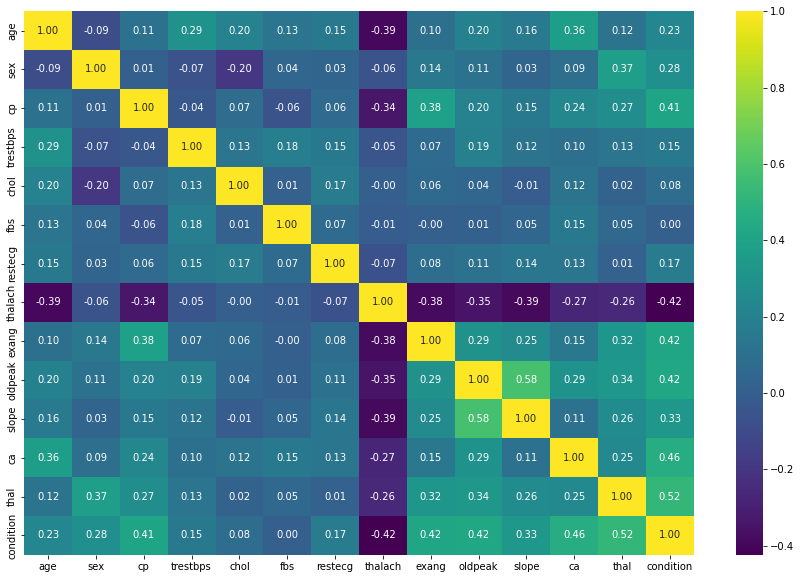

In [17]:
# correlation
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='viridis', cbar=True)

# Auto report

In [23]:
import pandas_profiling

df.profile_report()
# profile = df.profile_report(title='Pandas Profiling Report', progress_bar=False)
# profile.to_file("your_report.html")
# json_data = profile.to_json(), или profile.to_file("your_report.json")

# Conclusion

# Modelling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train, y_train)

roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8855218855218855